<a href="https://colab.research.google.com/github/saurabhsingh1411/analytics_vidhya/blob/main/AV%20Customer%20Segmentation%20Job%20a%20thon%2028%20May%2021/AV_CUSTROMER_SEGMENTATION_CLASSIFICATION_28_MAY%5BDNN%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [10]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [11]:
print(train.shape)

(245725, 11)


In [12]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [13]:
train['Credit_Product']=train['Credit_Product'].map({'No':0,'Yes':1})

train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,0.0,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,0.0,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,0.0,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,0.0,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,0.0,886787,No,0


In [14]:
train['Credit_Product']=train['Credit_Product'].fillna(0.5)

train['Credit_Product'].value_counts()

0.0    144357
1.0     72043
0.5     29325
Name: Credit_Product, dtype: int64

In [15]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [16]:
train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

DATA VISULIZATION


In [17]:
import seaborn as sns


In [31]:
cor_matrix=train.corr()

#sns.heatmap(corr)

In [32]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,0.0,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,0.0,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,0.0,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,0.0,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,0.0,886787,No,0


In [35]:
le=LabelEncoder()
train['Gender']=le.fit_transform(train['Gender'])
train['Occupation']=le.fit_transform(train['Occupation'])
train['Is_Active']=le.fit_transform(train['Is_Active'])
train['Channel_Code']=le.fit_transform(train['Channel_Code'])

In [36]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,1,2,43,0.0,1045696,0,0
1,IDD62UNG,0,30,RG277,2,0,32,0.0,581988,0,0
2,HD3DSEMC,0,56,RG268,3,2,26,0.0,1484315,1,0
3,BF3NC7KV,1,34,RG270,2,0,19,0.0,470454,0,0
4,TEASRWXV,0,30,RG282,2,0,33,0.0,886787,0,0


In [37]:
train=train.drop(labels=['ID','Region_Code'],axis=1)

train.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,1,2,43,0.0,1045696,0,0
1,0,30,2,0,32,0.0,581988,0,0
2,0,56,3,2,26,0.0,1484315,1,0
3,1,34,2,0,19,0.0,470454,0,0
4,0,30,2,0,33,0.0,886787,0,0


In [38]:
cor_matrix=train.corr()

In [39]:
cor_matrix

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
Gender,1.000000,0.152076,0.031536,0.150586,0.146380,0.064666,0.022477,0.064207,0.072068
Age,0.152076,1.000000,-0.127753,0.605543,0.631242,0.202597,0.145232,0.218770,0.230814
Occupation,0.031536,-0.127753,1.000000,0.123937,0.027156,0.017571,-0.038496,0.077208,0.012415
Channel_Code,0.150586,0.605543,0.123937,1.000000,0.537852,0.259124,0.099911,0.249655,0.261211
Vintage,0.146380,0.631242,0.027156,0.537852,1.000000,0.178813,0.167433,0.209356,0.279642
Credit_Product,0.064666,0.202597,0.017571,0.259124,0.178813,1.000000,0.062460,-0.089567,0.313722
Avg_Account_Balance,0.022477,0.145232,-0.038496,0.099911,0.167433,0.062460,1.000000,0.076637,0.053370
Is_Active,0.064207,0.218770,0.077208,0.249655,0.209356,-0.089567,0.076637,1.000000,0.085723
Is_Lead,0.072068,0.230814,0.012415,0.261211,0.279642,0.313722,0.053370,0.085723,1.000000


Since There is no variable which are highly co related with hence there is no need to drop anything

Plotting Graph

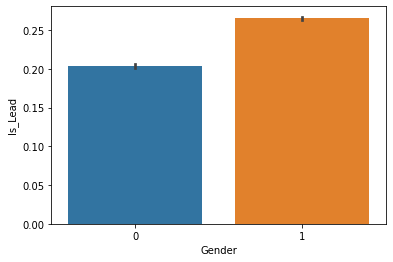

In [46]:
sns.barplot(x=train['Gender'],y=train['Is_Lead'])

In [42]:
train['Gender'].value_counts()

1    134197
0    111528
Name: Gender, dtype: int64

In [47]:
train.tail(10)

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245715,0,26,1,0,19,0.0,903608,1,0
245716,1,41,3,3,14,0.0,368949,1,0
245717,1,42,3,3,13,0.0,217266,1,0
245718,1,40,3,1,13,0.0,864937,1,0
245719,0,38,2,1,13,1.0,354665,0,0
245720,1,51,3,2,109,0.5,1925586,0,0
245721,1,27,2,0,15,0.0,862952,1,0
245722,0,26,2,0,13,0.0,670659,0,0
245723,0,28,2,0,31,0.0,407504,0,0
245724,1,29,2,0,21,0.0,1129276,0,0


In [49]:
y=train['Is_Lead']

In [50]:
train=train.drop(['Is_Lead'],axis=1)

In [58]:
sc=StandardScaler()
train=sc.fit_transform(train)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.1,random_state=35)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(221152, 8)
(24573, 8)
(221152,)
(24573,)


In [60]:
type(train)

numpy.ndarray

## Model Building

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [65]:
model=Sequential()

model.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dropout(rate=0.1)) 

model.add(Dense(6, activation = 'relu')) 
model.add(Dropout(rate=0.1)) 
model.add(Dense(6, activation = 'relu')) 
model.add(Dropout(rate=0.1)) 
model.add(Dense(3, activation = 'relu')) 
model.add(Dropout(rate=0.1)) 
model.add(Dense(1, activation = 'sigmoid')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [66]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [67]:
history=model.fit(X_train,y_train,batch_size=32,epochs=200,validation_data=(X_test,y_test),verbose=2)

Epoch 1/200
6911/6911 - 9s - loss: 0.4474 - accuracy: 0.7919 - val_loss: 0.3855 - val_accuracy: 0.8423
Epoch 2/200
6911/6911 - 8s - loss: 0.4014 - accuracy: 0.8281 - val_loss: 0.3754 - val_accuracy: 0.8459
Epoch 3/200
6911/6911 - 8s - loss: 0.3944 - accuracy: 0.8323 - val_loss: 0.3701 - val_accuracy: 0.8471
Epoch 4/200
6911/6911 - 8s - loss: 0.3917 - accuracy: 0.8319 - val_loss: 0.3746 - val_accuracy: 0.8461
Epoch 5/200
6911/6911 - 8s - loss: 0.3910 - accuracy: 0.8326 - val_loss: 0.3711 - val_accuracy: 0.8469
Epoch 6/200
6911/6911 - 8s - loss: 0.3898 - accuracy: 0.8331 - val_loss: 0.3705 - val_accuracy: 0.8470
Epoch 7/200
6911/6911 - 8s - loss: 0.3893 - accuracy: 0.8327 - val_loss: 0.3695 - val_accuracy: 0.8476
Epoch 8/200
6911/6911 - 8s - loss: 0.3899 - accuracy: 0.8325 - val_loss: 0.3717 - val_accuracy: 0.8475
Epoch 9/200
6911/6911 - 8s - loss: 0.3890 - accuracy: 0.8331 - val_loss: 0.3785 - val_accuracy: 0.8479
Epoch 10/200
6911/6911 - 9s - loss: 0.3892 - accuracy: 0.8328 - val_loss:

predicting on Testing Sets

In [68]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [69]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [70]:
test['Credit_Product']=test['Credit_Product'].map({'No':0,'Yes':1})

In [71]:
test['Credit_Product']=test['Credit_Product'].fillna(0.5)

test['Credit_Product'].value_counts()

0.0    61608
1.0    31182
0.5    12522
Name: Credit_Product, dtype: int64

In [72]:
test['Gender']=le.fit_transform(test['Gender'])
test['Occupation']=le.fit_transform(test['Occupation'])
test['Is_Active']=le.fit_transform(test['Is_Active'])
test['Channel_Code']=le.fit_transform(test['Channel_Code'])

In [73]:

test=test.drop(labels=['ID','Region_Code'],axis=1)

test.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,1,0,25,1.0,742366,0
1,1,43,1,1,49,0.5,925537,0
2,1,31,2,0,14,0.0,215949,0
3,1,29,1,0,33,0.0,868070,0
4,0,29,1,0,19,0.0,657087,0


In [74]:
sc=StandardScaler()
test=sc.fit_transform(test)

In [75]:
print(test.shape)

(105312, 8)


In [84]:
y_pred_test=(model.predict(test) > 0.5).astype("int32")

In [85]:
#y_pred_test=np.argmax(y_pred_test,axis=-1)
y_pred_test[1:15]

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

In [86]:
test_final=pd.read_csv('test.csv')
submission=pd.DataFrame()
submission['ID']=test_final['ID']
submission['Is_Lead']=y_pred_test

In [87]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [88]:
submission.to_csv('FinalSubmission.csv',index=False)